In [1]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# Residuals
Residual is just another name for error.

## Error in Estimation (Review)
$$ Error = Actual - Estimate$$

Errors can be either positive or negatice

To measure the rough size of the errors,
1. **Square** the **errors** to eliminate cancellation
2. Take the **mean** of the squared errors
3. Take the square **root** to fix the units

The final product is the **root mean square error** (`rmse`).

## Residuals
"Residual" is more of the traditional statistics term for error in regression estimate.

One residual corresponds to each point ($x$, $y$).

$$ residual = \text{observed } y - \text{regression estimate of }y$$

Another way of looking at **residual** is:
$$ residual = \text{observed } y - \text{height of regression line at }x$$

or:
$$ residual = \text{vertical difference between point and line}$$

## Demo
Below we have functions that we defined from last lecture,

In [2]:
def standard_units(any_numbers):
    """ Convert any array of numbers to standard units. """
    # (value - mean) / SD
    return (any_numbers - np.mean(any_numbers)) / np.std(any_numbers)

def correlation(t, x, y):
    """ Return the correlation coefficient (r) of 2 variables."""
    # mean of the product of x and y
    return np.mean(standard_units(t.column(x)) * standard_units(t.column(y)))

def slope(t, x, y):
    """ The slope of the regression line (original units)"""
    # slope = r * SD of y / SD of x
    r = correlation(t, x, y)
    return r * np.std(t.column(y)) / np.std(t.column(x))

def intercept(t, x, y):
    """ The intercept of the regression line (original units)"""
    # mean of y - slope * mean of x
    return np.mean(t.column(y)) - slope(t, x, y) * np.mean(t.column(x))

def fit(table, x, y):
    """ Return the height of the regression line at each x value"""
    a = slope(table, x, y)
    b = intercept(table, x, y)
    return a * table.column(x) + b

Recall we have the `Little Women` data and `Shotput` data,

In [3]:
lw = Table.read_table('little_women.csv').move_to_start('Periods')
lw.show(3)

Periods,Characters
189,21759
188,22148
231,20558


In [4]:
shotput = Table.read_table('shotput.csv')
shotput.show(3)

Weight Lifted,Shot Put Distance
37.5,6.4
51.5,10.2
61.3,12.4


Below is the regression line for the `Little Women` dataset,

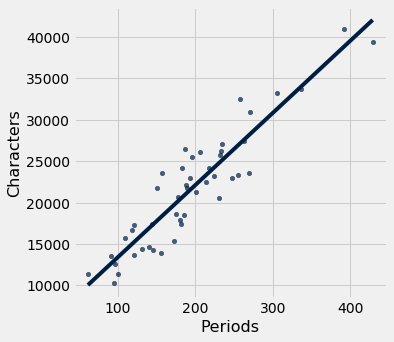

In [5]:
lw.scatter(0, 1, fit_line = True)

The residual is defined as the vertical distance between each data point to the regression line. Each data point has its own residual. Below we calculate the residual of each value by subtracting each `y` with the fitted `y`.

In [6]:
y = lw.column(1)
fitted = fit(lw, 0, 1)
residuals = y - fitted

If we take the `sum` of the residuals,

In [7]:
sum(residuals)

-3.637978807091713e-11

The `sum` of the residuals is roughly `0`! In fact, if we fit the regression line to a bunch of data points, the sum of the residual is always `0`. This implies that the amount of data points above the line is about the same as that below the line. 

Instead of taking the `sum`,
1. **Square** the residuals
2. Take the **average**
3. Square **root** the average

The final product would be the `rmse`!

In [8]:
np.mean(residuals ** 2) ** 0.5

2701.690785311856

## Residual Plot
Below we have the **residual plot**, which is similar to the plot before but the y-axis this time is the `Residual`. This plot shows the distance of each point from the regression line.

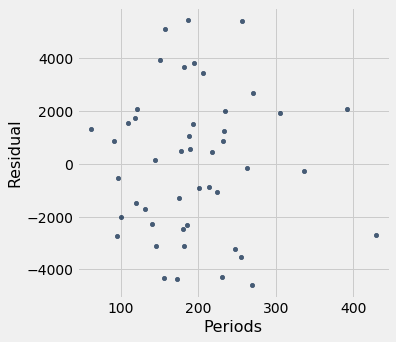

In [9]:
lw.with_column('Residual', residuals).scatter(0, 2)

When the `x` and `y` plot has a linear relationship, the `residual` plot will look like a random cloud (no particular shape or pattern). 

Below is a function `plot_residuals` that takes in a table with 2 columns, both numerical data, and does the following:
1. Creates a scatter plot along with the regression line
2. Calculates the residuals
3. Print the `sum` of residuals and `RMSE`
4. Plot the x-axis against the `Residuals` as the y-axis

In [10]:
def plot_residuals(t):
    t.scatter(0, 1, fit_line = True) #Create a scatter plot
    y = t.column(1)
    fitted = fit(t, 0, 1) #Calculates the fitted y
    residuals = y - fitted #Calculates the residuals
    print('Sum of residuals:', sum(residuals)) # Calculates and prints the sum of residuals
    print('RMSE:', np.mean(residuals**2) ** 0.5) #Calculates the RMSE
    t.with_column('Residual', residuals).scatter(0, 2) # Create a scatter plot of x-axis vs. Residuals

Sum of residuals: 5.5067062021407764e-14
RMSE: 1.2194444845058543


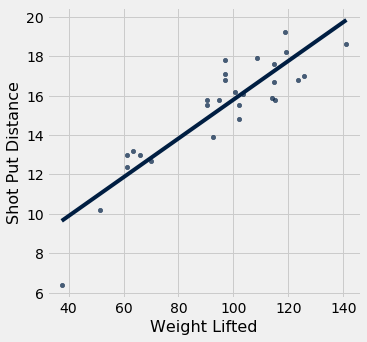

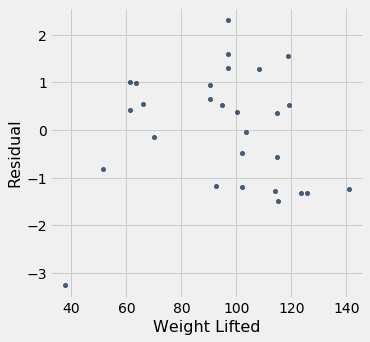

In [11]:
plot_residuals(shotput)

From the **residual plot** above, the data points on the right side of the plot seemed to be scattered normally, while there appear to be an outlier on the left side of the plot.

## Residual Plot
If we are trying to decide whether a linear model would be a good fit, always plot the data points first. If our data points look linear, the line should fit the data points just fine. 

Another way of diagnosing whether the data points follow a linear pattern is to plot the residuals. A scatter diagram should look like an unassociated blob for linear relations (random pattern). 

If the data points don't follow a line (e.g. it follows a curve instead), we should see a pattern in the residual plot. That should tell us that the linear model is not a good fit.

# Regression Diagnostics 
## Demo
Below we have a dataset about the length of dugongs with varying ages. The lengths are in meters.

In [12]:
dugong = Table.read_table('dugongs.txt')
dugong.show(3)

Age,Length
1,1.8
1.5,1.85
1.5,1.87


Now let's try to use the `plot_residuals` function on this dataset,

Sum of residuals: -7.771561172376096e-15
RMSE: 0.15046839278249727


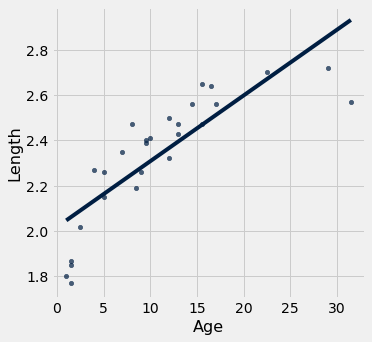

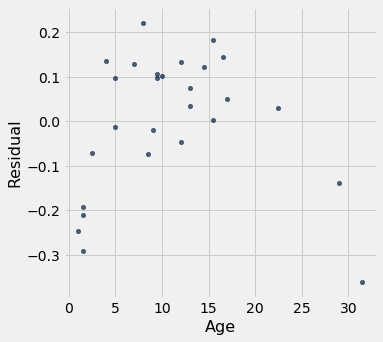

In [13]:
plot_residuals(dugong)

From the `Age vs. Length` plot, it seems that the dugongs grow very fast during young age. The growth decreased as the dugongs reach adulthood. 

If we look at the residual plot, the data points somewhat resemble a curve. 

From these 2 observations, we can tell that a line model might not be a good fit.

Below we have a dataset of `us_women` height and the average weight. 

In [14]:
us_women = Table.read_table('us_women.csv')
us_women.show(3)

height,ave weight
58,115
59,117
60,120


If we calculate the linear correlation (`r`) above,

In [15]:
correlation(us_women, 0, 1)

0.9954947677842161

We can see that the correlation is relatively very high! If we use the `plot_residuals` function on the dataset,

Sum of residuals: 2.842170943040401e-14
RMSE: 1.4197026292697896


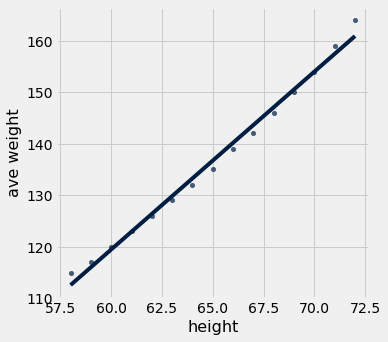

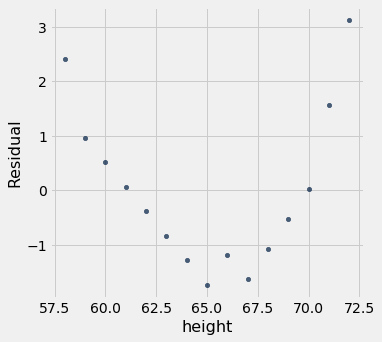

In [16]:
plot_residuals(us_women)

We can see that the `height vs. ave weight` plot looks linear, but the `Residual` plot shows a pattern. What is going on?

This is what's called **ecological correlation**. Notice that the y-values are **averages**, not individual points! We can't make conclusion about the distribution of actual individual woman heights based on this plot.

# Properties of Residuals
## Residual Variance
1. The `mean` of residuals is always `0`, regardless of what the original data looks like

2. It turns out that there are `variance` (spread) in `residuals`. 
    * Recall that `variance` = $SD^2$
    * It's a mean squared deviation
    
$$
\frac
{\text{Variance of } \textbf{residuals}}
{\text {Variance of } \textbf{y}}
= 1 - r^2 
$$

**If `r` = 1 (perfect linear correlation), then there's no variance in the residuals**
* The line would go through all the data points perfectly, so there would be no residual

$$
\frac
{\text{Variance of } \textbf{fitted values}}
{\text {Variance of } \textbf{y}}
= r^2 
$$

**If `r` is `0` (no correlation, just random cloud of points), then there's no variance in the fitted values**


$$
\text{Variance of } \textbf{y} = 
{\text{Variance of } \textbf{fitted values}} + 
{\text {Variance of } \textbf{residuals}}
$$

This means the spread of the original data points `y` is the sum of the spread of the regression line and the spread of the residuals.

## Demo


In [17]:
def r_scatter(r):
    """
    Generate a scatter plot with a correlation approximately r
    and print variance ratios
    """
    plt.figure(figsize=(5,5))
    x = np.random.normal(0, 1, 2000)
    z = np.random.normal(0, np.sqrt(1-r**2), 2000)
    y = r*x + z
    
    fitted = r*x
    resid = y - fitted
    print('Var resid / var y      =', np.round(np.var(resid) / np.var(y), 2))
    print('Var fitted / var y     =', np.round(np.var(fitted) / np.var(y), 2))
    print('Var y                  =', np.round(np.var(y), 1))
    print('Var fitted + var resid =', np.round(np.var(fitted) + np.var(resid), 1))
    
    plt.scatter(x, y, c='gray')
    plt.scatter(x, fitted, c='dodgerblue')
    plt.xlim(-4, 4)
    plt.ylim(-4, 4)
    plt.show()

In [18]:
_ = interact(r_scatter, r=(-1, 1, 0.1))

interactive(children=(FloatSlider(value=0.0, description='r', max=1.0, min=-1.0), Output()), _dom_classes=('wi…

The variance of `y` is the variance of the grey data points. As we change the `r`, the `Residual` variance and the `fitted` variance are changing, but they always sum up to `1`. This is because we are observing:
1. "How much of the original `y` variance is accounted for in the `residual` variance" and
2. "How much of the original `y` variance is accounted for in the `fitted` variance". 

Thus, the sum of
1. Variance of the `fitted` value (blue dots), and
2. Variance of the `Residuals`, which is how much each grey dot deviates from the fitted values

is equal to the variance (spread) of the original data (grey points).


### When `r` is `0`:
1. The variance of the blue points (`fitted` value) is `0`. This is because all the `fitted` value are `0` in y-axis and thus, there are no variance. 
2. Meanwhile, the variation of the original data points (grey points) are `1`. 

### When `r` is `0.5`:
1. The `Residual` variance is around 0.75, while the `Fitted` variance is around 0.25.
2. This means 3/4 of the original data variance comes from the `Residual`, while about 1/4 comes from the blue data points. 

### When `r` is `1` or `-1`:
1. All of the original `y` (grey points) fit into the regression line. 
2. This means the `residual` has no variance. Thus, the variance of the original points `y` only consists of the variance from the `fitted` lines. 

We don't have to memorize the whole thing. However, we need to understand that, if `r` is `0` or `1`, what would the variance of the residuals and the `fitted` line be.

## Discussion Question
Recall that `SD` = $\sqrt{variance}$

How does the `SD` of the `fitted` values relate to `r`?

$$
\text{A) } \frac
{\text{SD of } \textbf{fitted}}
{\text {SD of } \textbf{y}}
= r 
$$

$$
\text{B) }\frac
{\text{SD of } \textbf{fitted}}
{\text {SD of } \textbf{y}}
= |r| 
$$

$$
\text{C) }\frac
{\text{SD of } \textbf{fitted}}
{\text {SD of } \textbf{residuals}}
= r 
$$

$$
\text{D) }\frac
{\text{SD of } \textbf{fitted}}
{\text {SD of } \textbf{residuals}}
= |r| 
$$

The correct answer is B). This implies that if we look at the `SD` and use it as a measure of the spread of the original data points `y`, the absolute value of the `r` tells us how much of the spread came from the `fitted` value. 

# Regression Model
The reason we covered about the complicated topic of `variance` is that we're about to cover inference using regression. In order to do inference, first we need to have a model of how regression works or why we drew the regression line in the first place.

## A "Model": Signal + Noise
<img src = 'model.jpg' width = 500/>

Suppose we have an original population of points that **actually** has a linear relationship between the 2 variables `x` and `y` (e.g. height of parents vs. height of children). When we take samples from population, we'll obtain the line combined with **some noises**
* Noises are some possible errors (e.g. some errors when measuring people's heights using ruler, people are taller during the day compared to during the night)

In above picture, the green line is the actual linear relationship. When we sample, the points are not perfectly on the line and thus, there are some deviations. These deviations are what we define as the `noise`.

If we believe that the points come from the line (the linear model is true), then we would think that the distance between the points and the line follow a normal distribution. This means most of the points should theoretically be close to the line. 

## What We Get to See
<img src = 'see.jpg' width = 500/>
If the linear model is correct, the points above are the actual data points that we see. Is this good or bad?

## Regression Model

The green line is the true line.
We took sample from the true line, and we obtain the points below.


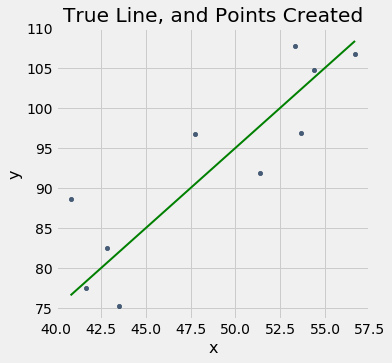

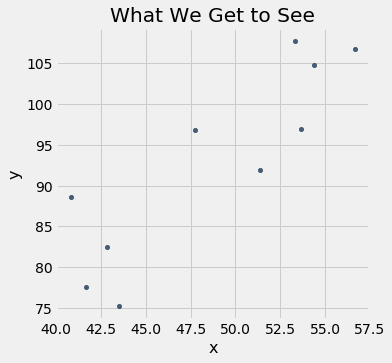

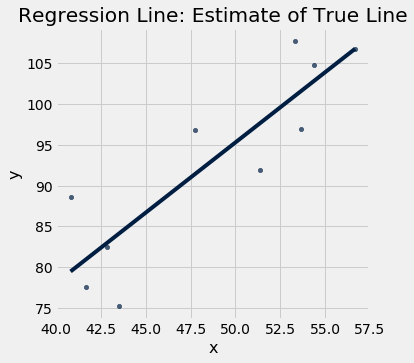

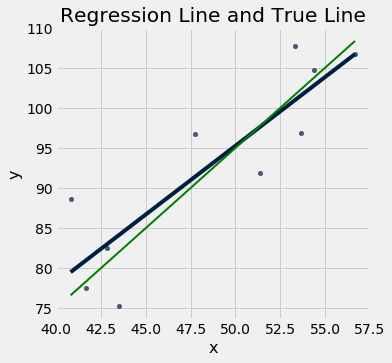

In [24]:
def draw_and_compare(true_slope, true_int, sample_size):
    x = np.random.normal(50, 5, sample_size)
    xlims = np.array([np.min(x), np.max(x)])
    errors = np.random.normal(0, 6, sample_size)
    y = (true_slope * x + true_int) + errors
    sample = Table().with_columns('x', x, 'y', y)

    sample.scatter(0, 1)
    plt.plot(xlims, true_slope*xlims + true_int, lw=2, color='green')
    plt.title('True Line, and Points Created')
    print("The green line is the true line.")
    print("We took sample from the true line, and we obtain the points below.")

    sample.scatter(0, 1)
    plt.title('What We Get to See')

    sample.scatter(0, 1, fit_line=True)
    plt.title('Regression Line: Estimate of True Line')

    sample.scatter(0, 1, fit_line=True)
    plt.plot(xlims, true_slope*xlims + true_int, lw=2, color='green')
    plt.title("Regression Line and True Line")
    
draw_and_compare(2, -5, 10)

Above, we see the comparison of the true line vs. the line that we estimated as the regression line. If we take more samples, the regression line gets closer to the actual line.

The green line is the true line.
We took sample from the true line, and we obtain the points below.


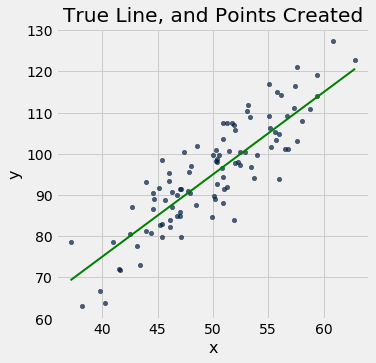

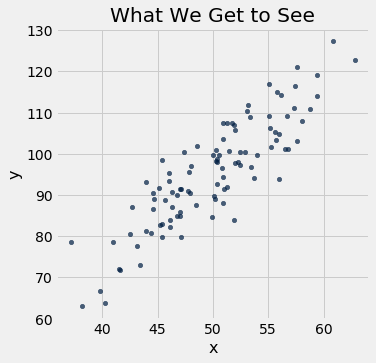

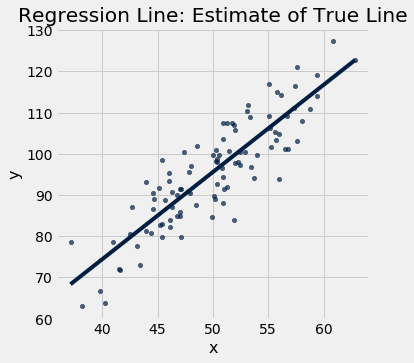

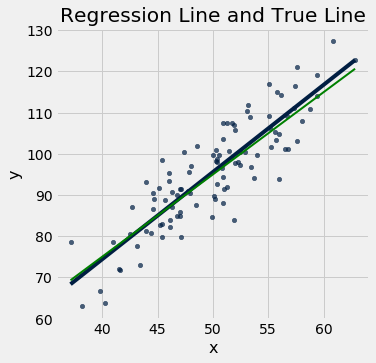

In [25]:
draw_and_compare(2, -5, 100)

The green line is the true line.
We took sample from the true line, and we obtain the points below.


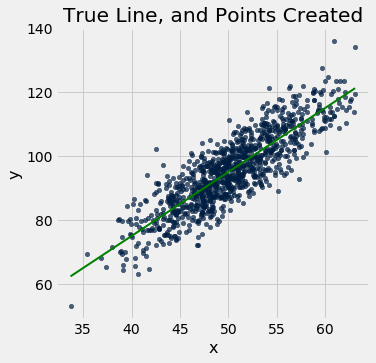

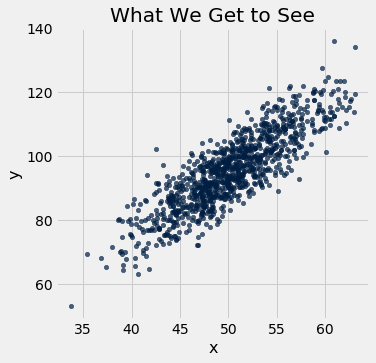

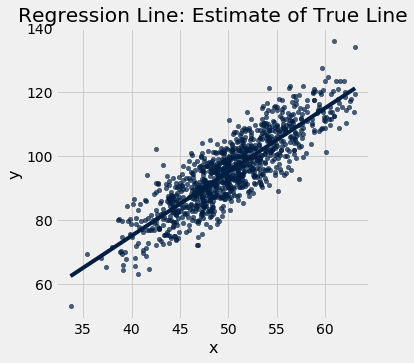

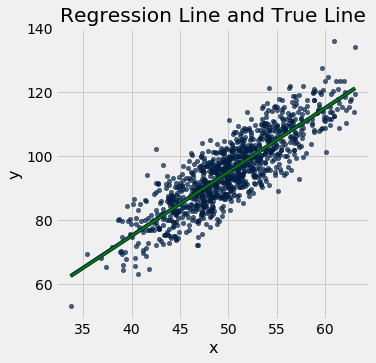

In [26]:
draw_and_compare(2, -5, 1000)

When we take a sample, we can obtain a few statistics, such as the correlation `r` and the slope. From there, we can analyze whether the regression line slope is close to the actual line slope.